# TASCA M4 T01 IT ACADEMY
# Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.  
  
Crea almenys una visualització per:  
  
* Una variable categòrica (Districte o Barri)
* Una variable numèrica (Preu)
*Una variable numèrica i una categòrica (Districte i Preu)
* Dues variables numèriques (Any o Trimestre i Preu)
* Tres variables (Barri o Districte, Trimestre i Preu)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Cargamos los datos
alquilerDF= pd.read_csv ("preu lloguer per trimestre i barri.csv")
pd.set_option('display.max_columns', None)
alquilerDF

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


## Limpieza de datos en el dataframe
> Antes de empezar a trabajar con cualquier datos es importante revisarlos de forma preliminar para analizar si hay existencia de algún valor nulo, columnas que no aportan valor...etc.

In [3]:
#Revisamos si hay valores nulos
alquilerDF.isna().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

> No hay valores nulos en ningúna columna

In [4]:
alquilerDF.groupby('Any').size()

Any
2021    584
dtype: int64

In [5]:
#Todos los valores son del año 2021, eliminare la columna any
alquilerDF = alquilerDF.drop(['Any'], axis=1)

In [6]:
alquilerDF.dtypes

Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [291]:
#EL Preu debería ser un valor númerico, por lo tanto, hacemos un Cast al Preu de object a float
alquilerDF= alquilerDF['Preu'].astype(float)  


> Al intentar ejecutar esta línea de código daba un error, hay datos en la columna que tiene valor "--", estas filas las procederemos a eliminar.

In [9]:
#Eliminar filas con valor "--"
alquilerDF = alquilerDF.loc[alquilerDF['Preu'] != '--']

In [10]:
# Ahora sí, convertimos la ultima columna a float
alquilerDF['Preu']= alquilerDF['Preu'].astype(float) 

In [13]:
alquilerDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trimestre       540 non-null    int64  
 1   Codi_Districte  540 non-null    int64  
 2   Nom_Districte   540 non-null    object 
 3   Codi_Barri      540 non-null    int64  
 4   Nom_Barri       540 non-null    object 
 5   Lloguer_mitja   540 non-null    object 
 6   Preu            540 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 33.8+ KB


> Se han reducido los valores de 584 a 540 en cada columna

In [16]:
alquilerDF.groupby('Lloguer_mitja').size()

Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              270
Lloguer mitjà per superfície (Euros/m2 mes)    270
dtype: int64

> **Algo muy importante a tomar en cuenta es la columna Lloguer_mitja presenta dos datos, uno en función de euros por mes y la otra en función de euros-m2 por mes. En mi caso, creo que es conveniente dividir el data frame en 2.**

In [22]:
# Divir el data frame en 2 dataframe para mejorar el manejo de los datos
alquilerEUR_MES = alquilerDF.loc[alquilerDF.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']
alquilerEUR_M2_MES = alquilerDF.loc[alquilerDF.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']

In [27]:
print(alquilerEUR_MES['Preu'].describe())

print(alquilerEUR_M2_MES['Preu'].describe())

count     270.000000
mean      871.593704
std       221.192799
min       447.500000
25%       742.475000
50%       816.350000
75%       934.525000
max      1816.500000
Name: Preu, dtype: float64
count    270.000000
mean      12.720741
std        1.701480
min        6.700000
25%       11.625000
50%       12.750000
75%       13.600000
max       18.000000
Name: Preu, dtype: float64


### Lloguer mitjà mensual (Euros/mes)    
> Lloguer mitjà mensual  es de: 871 EUR/mes.   
> El 75% de los alquileres no supera los 934 EUR/mes.


### Lloguer mitjà per superfície (Euros/m2 mes)
> Lloguer mitjà per superfície es :  12.72 Euros/m2 mes   
> El 75% de los alquileres no supera los 13.60 EUR/ m2 por mes.

### Descripción estadística por distrito y Precio

El análisis puede realizarse también por distrito. Lo cual se realiza a continuación

In [44]:
alquilerEUR_MES.groupby('Nom_Districte')['Preu'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Sarrià-Sant Gervasi,24.0,1271.212500,190.916844,990.1,1138.375,1278.85,1371.625,1597.4
Les Corts,12.0,1214.066667,359.670946,904.8,969.000,1007.90,1618.475,1816.5
Eixample,24.0,1000.545833,105.239524,887.1,922.800,964.95,1070.800,1220.8
Sant Martí,40.0,916.450000,178.808413,700.5,795.350,869.20,976.975,1364.7
Gràcia,20.0,877.265000,65.810072,745.4,859.175,895.65,921.800,961.0
Ciutat Vella,16.0,858.925000,70.783468,759.2,800.225,870.00,924.500,968.4
Sants-Montjuïc,28.0,798.932143,38.952935,691.9,778.325,805.25,818.350,872.5
Horta-Guinardó,40.0,765.007500,61.542836,653.5,726.450,756.30,817.825,884.2
Sant Andreu,26.0,721.196154,94.357187,447.5,647.800,755.45,792.500,827.2


> Sarrià-Sant Gervasi es el barrio más caro con una media de 1271 EUR/MES para al año 2021, el más económico en promedio es Nou Barris con 664 EUR/MES.  

> Les Corts tiene la desviación estandar más grande con 359 EUR/MES y un valor máximo de alquiler para todos los datos del dataframe con 1816 EUR/MES, lo que indica que en este barrio se pueden encontrar alquiler de casas/pisos aún más altos que en Sarrià-Sant Gervasi.

In [45]:
alquilerEUR_M2_MES.groupby('Nom_Districte')['Preu'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Sarrià-Sant Gervasi,24.0,15.012500,1.265362,11.4,14.450,15.10,15.750,18.0
Les Corts,12.0,14.008333,0.994949,12.5,13.250,13.90,14.425,15.8
Ciutat Vella,16.0,13.775000,1.417274,12.3,12.875,13.20,14.375,16.4
Sant Martí,40.0,13.440000,1.855664,10.8,11.675,13.15,14.675,17.3
Gràcia,20.0,13.380000,0.661418,12.1,12.800,13.60,13.900,14.3
Eixample,24.0,13.300000,0.353861,12.5,13.000,13.30,13.600,14.0
Sants-Montjuïc,28.0,12.678571,0.950383,10.2,12.450,13.00,13.200,13.8
Horta-Guinardó,40.0,11.987500,0.810567,9.5,11.675,12.10,12.625,13.4
Sant Andreu,26.0,11.153846,1.215971,6.7,10.750,11.60,11.875,12.5


> Sarrià-Sant Gervasi es el barrio más caro de con una media de 15  EUR/ m2 por mes para al año 2021, el más económico en promedio es Nou Barris con 10.92  EUR/ m2 por mes.

## VISUALIZACIÓN GRÁFICA

#### Una variable categòrica (Districte o Barri)

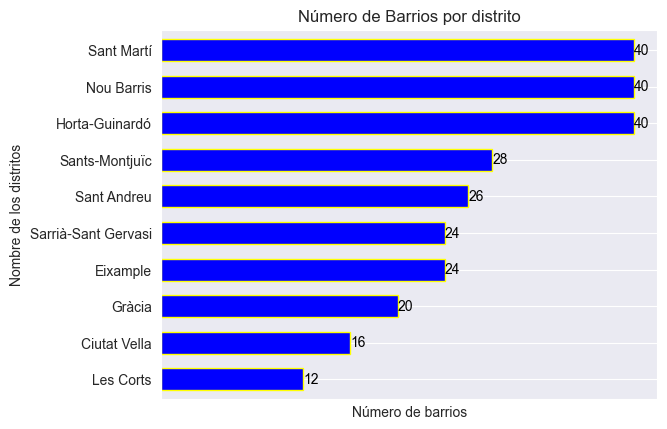

In [267]:
ax= alquilerEUR_MES.groupby('Nom_Districte')['Codi_Barri'].size().sort_values().plot(kind='barh',color='blue',edgecolor='yellow',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('Número de barrios')
plt.ylabel('Nombre de los distritos')
plt.title('Número de Barrios por distrito')
# Guardar imagen
plt.savefig("Numero_barrios_distrito.png")

> Los distritos con más barrios son 3 ( Sant Martí, Nou Barris y Horta-Guinardó), por el contrario, el que menos barrios tiene es Les Corts con tan solo 12.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ciutat Vella'),
  Text(1, 0, 'Eixample'),
  Text(2, 0, 'Sants-Montjuïc'),
  Text(3, 0, 'Les Corts'),
  Text(4, 0, 'Sarrià-Sant Gervasi'),
  Text(5, 0, 'Gràcia'),
  Text(6, 0, 'Horta-Guinardó'),
  Text(7, 0, 'Nou Barris'),
  Text(8, 0, 'Sant Andreu'),
  Text(9, 0, 'Sant Martí')])

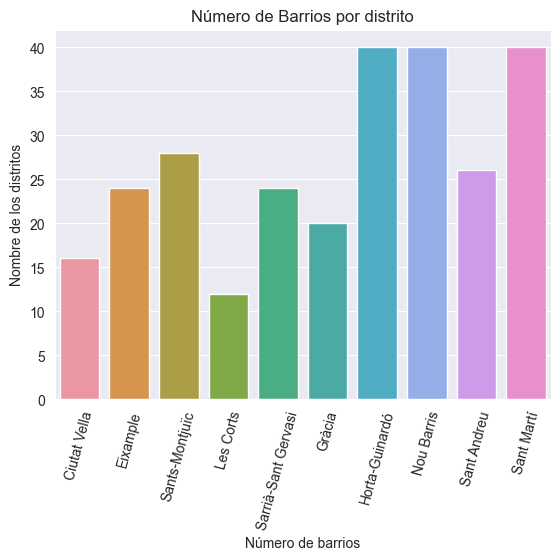

In [307]:
sns.countplot(x="Nom_Districte", data=alquilerEUR_MES)
plt.xlabel('Número de barrios')
plt.ylabel('Nombre de los distritos')
plt.title('Número de Barrios por distrito')
plt.xticks(rotation=75)

#### Una variable numèrica (Preu)

Una de las mejores gráficas para visualizar una variable númerica es el BoxPlot. Para entender el BoxPlot hace falta acompañarlo del 1Q y el 3Q.

count    270.000000
mean      12.720741
std        1.701480
min        6.700000
25%       11.625000
50%       12.750000
75%       13.600000
max       18.000000
Name: Preu, dtype: float64
Axes(0.125,0.11;0.775x0.77)


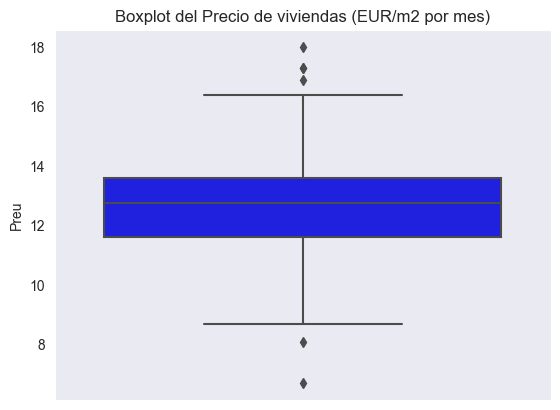

In [268]:
sns.set_style('dark')
print( alquilerEUR_M2_MES['Preu'].describe())
print(sns.boxplot(y=alquilerEUR_M2_MES['Preu'],color='blue'))
plt.title('Boxplot del Precio de viviendas (EUR/m2 por mes)')
# Guardar imagen
plt.savefig("Boxplot_alquiler_EUR_m2_mes.png")

> El boxplot nos muestra en lo "pintado" en azul el rango intercuartilico, es decir, el 25% de los precios estan por debajo de 11.62(EUR/m2 por mes) y el 75% alcanzan hasta 13.6(EUR/m2 por mes). 

> Otra manera de describirlo sería, el 50% de los precios esta entre 11.62(EUR/m2 por mes) y 13.6(EUR/m2 por mes)

> La mediana es la linea negra que divide el cuadro en azul, situandose en la mitad de los datos, 50%, en este caso 12.75 (EUR/m2 por mes).

> Importante ver que hay outliers que se pueden observar como pequeños diamantes.

#### Una variable numèrica i una categòrica (Districte i Preu)

Analizaremos el precio medio por distrito mediante boxplots

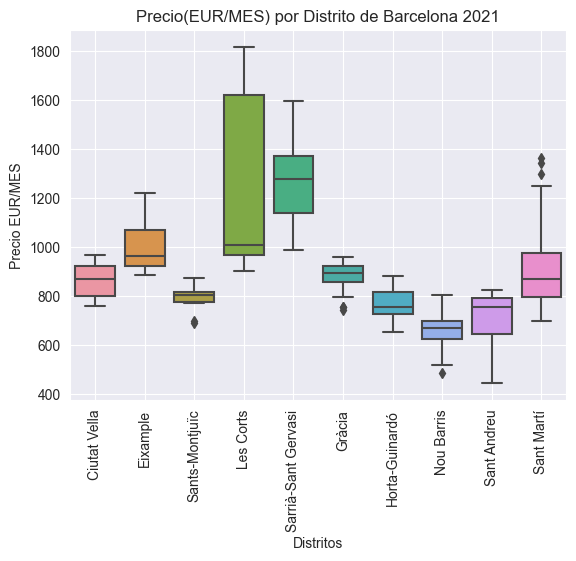

In [283]:
sns.set_style('dark')
#plt.figure(figsize=(12, 9))
sns.boxplot(x=alquilerEUR_MES['Nom_Districte'],y=alquilerEUR_MES['Preu'])
plt.xlabel('Distritos')
plt.ylabel('Precio EUR/MES')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Precio(EUR/MES) por Distrito de Barcelona 2021')
# Guardar imagen
plt.savefig("PrecioAlquiler_EUR_MES_2021.jpeg",  dpi=250, bbox_inches='tight')

> En esta gráfica se puede observar mejor lo comentado anteriormente. La media de precios más altos se encuentran en el distrito de Sarria-Sant Gervasi, sin embargo los máximos se pueden encontrar en Les Corts. 

> Nou Barris tiene los precios medios más bajos.

> En Sant Martí se tienen precios medios de 900 EUR/MES sin embargo pueden haber pisos más caros de lo normal(outliers) que alcanzan los precios de Sarria o Les Corts.

## Dues variables numèriques (Any o Trimestre i Preu)

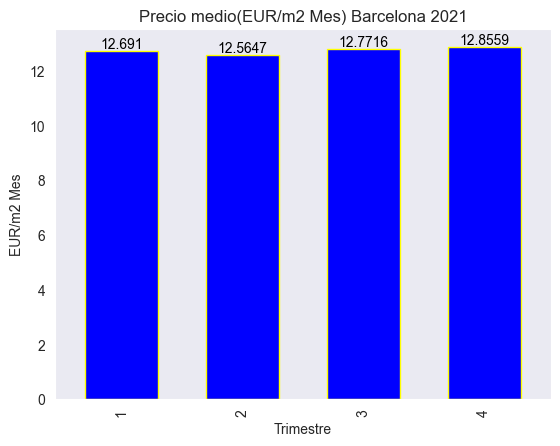

In [286]:
#plt.bar(alquilerEUR_M2_MES['Trimestre'],alquilerEUR_M2_MES['Preu'].mean())
                               
                               
ax= alquilerEUR_M2_MES.groupby('Trimestre')['Preu'].mean().plot(kind='bar',color='blue',edgecolor='yellow',width=0.6)
                               
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
plt.xlabel('Trimestre')
plt.ylabel('EUR/m2 Mes')
plt.title('Precio medio(EUR/m2 Mes) Barcelona 2021')

# Guardar imagen
plt.savefig("Preciomedio_EUR_m2_Mes_Barcelona2021_barras.png",  dpi=150)

> **La gráfica de barras no termina de ser tan visible para observar una tendencia, utilizaremos un plot a continuación:**

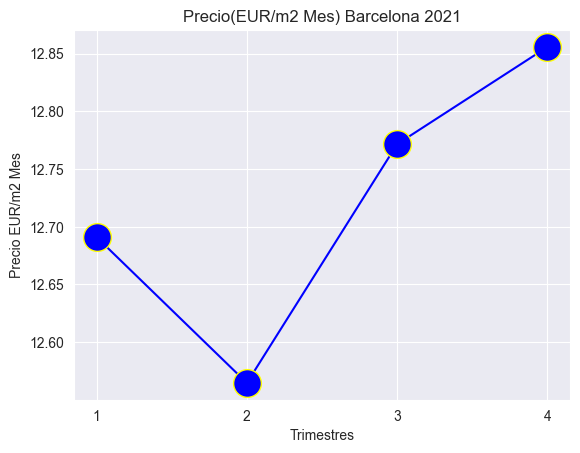

In [288]:
#alquilerEUR_M2_MES.groupby('Trimestre')['Preu'].mean().plot()

plt.plot(alquilerEUR_M2_MES.groupby('Trimestre')['Preu'].mean(),marker = 'o', ms = 20,color='blue',mec = 'yellow')
plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.xlabel('Trimestres')
plt.ylabel('Precio EUR/m2 Mes')
plt.grid(True)
plt.title('Precio(EUR/m2 Mes) Barcelona 2021')

# Guardar imagen
plt.savefig("Precio_EUR_m2_Mes_BCN2021_line.png",  dpi=150)


> **En esta gráfica si se logra observar que los precios por metro cuadrado han ido aumentando desde el segundo trimestre**

### Tres variables (Barri o Districte, Trimestre i Preu)

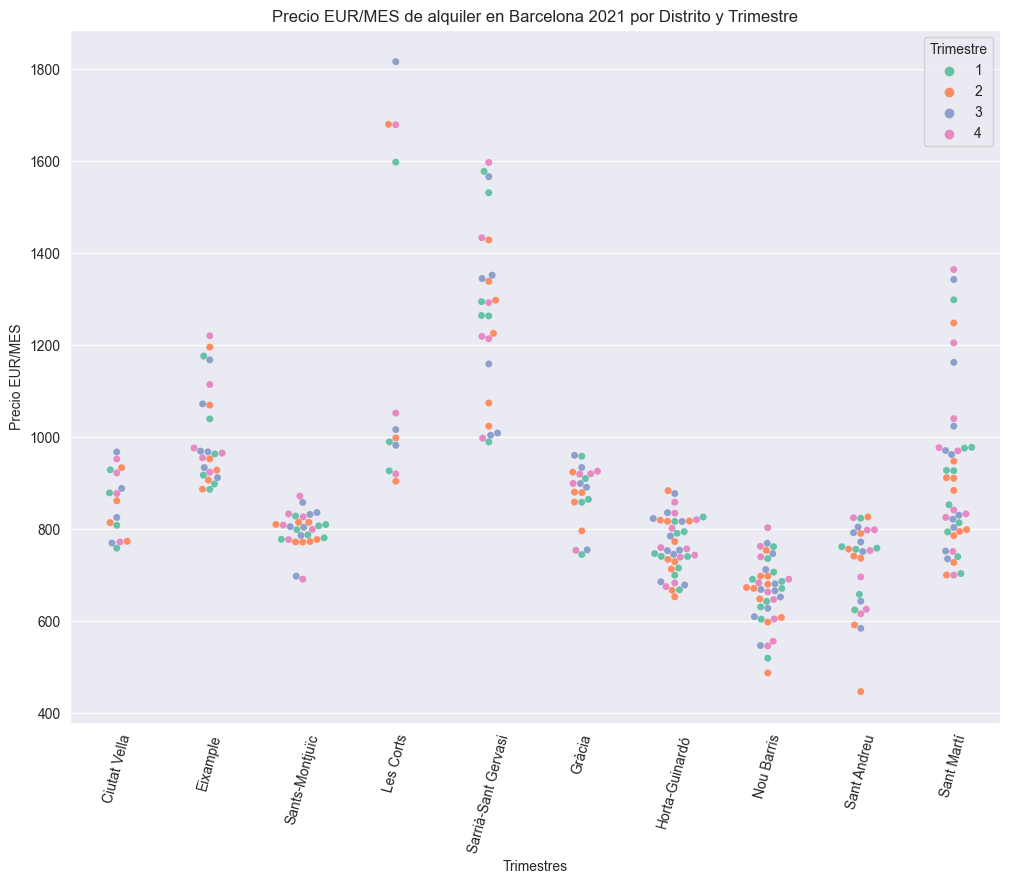

In [336]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 9))
sns.swarmplot(x=alquilerEUR_MES['Nom_Districte'],
              y=alquilerEUR_MES['Preu'],
              hue=alquilerEUR_MES['Trimestre'],
              palette="Set2")
plt.xticks(rotation=75)
plt.xlabel('Trimestres')
plt.ylabel('Precio EUR/MES')
plt.title('Precio EUR/MES de alquiler en Barcelona 2021 por Distrito y Trimestre')

# Guardar imagen
plt.savefig("Precio_Dist_Tri_EUR__Mes_BCN2021_.png",  dpi=250)



> Este gráfico es útil para observar donde se acumulan varios puntos del mismo color, con esto se observa el precio medio en cada Distrito dependiendo el Trimestre. Por ejemplo, los puntos de color rosa que represantan al trimestre 4 generalmente los encontramos arriba.

# Exercici 2

Exporta els gràfics com imatges o com HTML.

* Durante el ejercicio 1 se fueron guardando con : plt.savefig()

# Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

> Uno de los distritos que se encuentran en el centro de Barcelona es el Eixample, generalmente extranjeros buscan alquilar viviendas por esa zona para facilidad de movimiento y estar cerca de todo. Por lo tanto, me parece interesante dentro de ese distrito cuales son los precios de los barrios.

In [311]:
dfEixample= alquilerEUR_MES.loc[alquilerEUR_MES.Nom_Districte == 'Eixample']

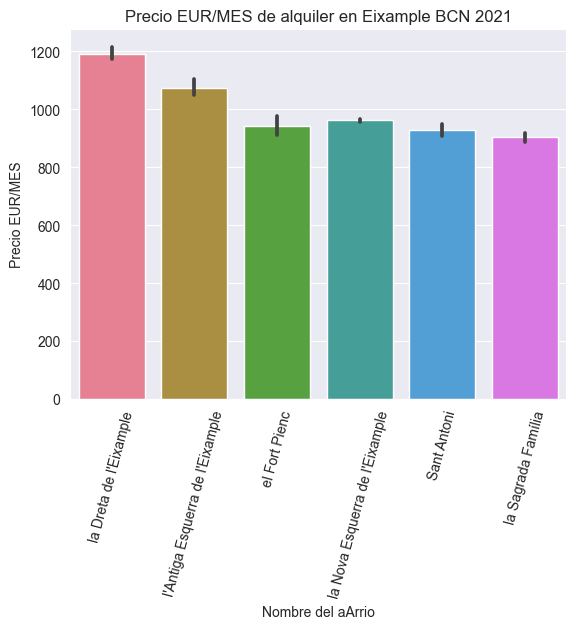

In [337]:
sns.barplot(x="Nom_Barri",
            y='Preu',
            data=alquilerEUR_MES.loc[alquilerEUR_MES.Nom_Districte == 'Eixample'].sort_values('Preu', ascending=False))

plt.xticks(rotation=75)
plt.xlabel('Nombre del aArrio')
plt.ylabel('Precio EUR/MES')
plt.title('Precio EUR/MES de alquiler en Eixample BCN 2021')

# Guardar imagen
plt.savefig("Precio_Eixample2021.png",  dpi=250)

> Para una persona que piense mudarse al Eixample y quiera una opción más economica puede escoger el barrio Sant Antoni o la Sagrada Familia.

## Por último creo que es importante realizar una comparativa de los precios en las dos unidades de medida que se trabajo:  
- EUR / Mes  
- EUR /m2 Mes  

¿Los distritos tendrán el mismo orden referente al precio y los m2? Encontremos

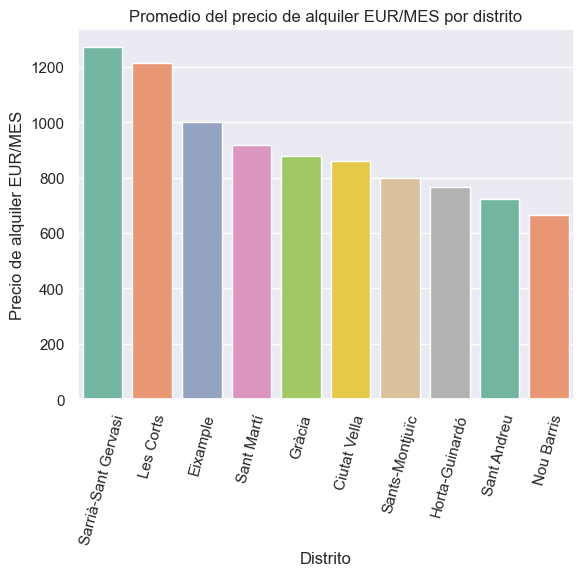

In [376]:
data1 = alquilerEUR_MES.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
sns.barplot(x=data1.index, y=data1.values, palette="Set2")
plt.title("Promedio del precio de alquiler EUR/MES por distrito")
plt.ylabel("Precio de alquiler EUR/MES")
plt.xlabel("Distrito")
plt.xticks(rotation=75)

# Guardar imagen
plt.savefig("PrecioProm_EUR_MES.png",  dpi=250)

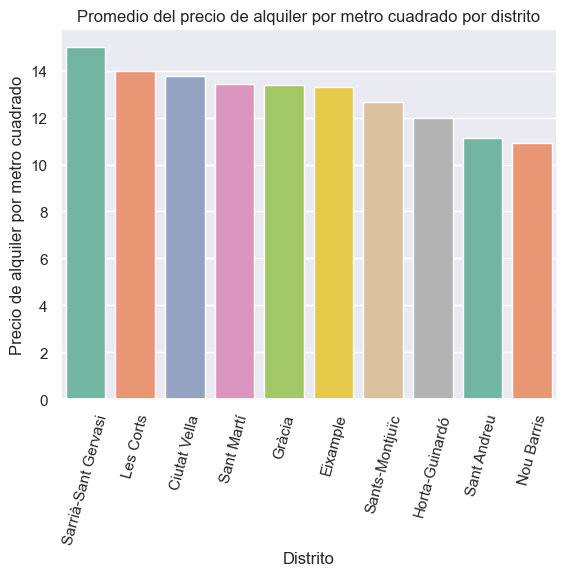

<Figure size 640x480 with 0 Axes>

In [377]:
data = alquilerEUR_M2_MES.groupby('Nom_Districte')['Preu'].mean().sort_values(ascending=False)
sns.barplot(x=data.index, y=data.values, palette="Set2")
plt.title("Promedio del precio de alquiler por metro cuadrado por distrito")
plt.ylabel("Precio de alquiler por metro cuadrado")
plt.xlabel("Distrito")
plt.xticks(rotation=75)
plt.show()

# Guardar imagen
plt.savefig("PrecioProm_EUR_m2_MES.png",  dpi=250)


**Observaciones: Los primeros dos distritos guardan el mismo orden tanto en precio EUR/MES como EUR/m2 Mes, sin embargo apartir del tercero, se observa que por ejemplo es más caro el Eixample en precio global, en m2 no es de lo más caros. Esto viene dado por la afinidad de las personas al buscar algún barrio en general para vivir. Al final, los m2 no pueden variar mucho ya que los espacios ya estan construidos, sin embargo el precio lo decide el dueño o dueña y puede ir variando en función de las preferencias del consumidor.**

**Al analizar esto, se puede decir que en Eixample pagaras generalmente más por tu piso pero tendrás maás espacio que por ejemplo en Ciutat Vella, donde podras acceder al barrio con un precio más "ecónomico" pero el metro cuadrado lo estaras pagando más alto.**